## Código de honor


> "Al entregar la solución de este parcial, yo, __Santiago Martínez Novoa__ con código __202112020__ me comprometo a no conversar durante el desarrollo de este examen con ninguna persona que no sea el profesor del curso, sobre aspectos relacionados con el parcial; tampoco utilizaré algún medio de comunicación por voz, texto o intercambio de archivos, para consultar o compartir con otros, información sobre el tema del parcial. Ni usaré alguna IA para resolver las preguntas del parcial. Soy consciente y acepto las consecuencias que acarreará para mi desempeño académico cometer fraude en este parcial"

## Respuestas a las preguntas del parcial
1. [10%] Defina el enfoque analítico que va a darle al proyecto e incluya su justificación.
Recuerde incluir los tipos de aprendizaje, tareas de aprendizaje y técnicas de aprendizaje automático
que va a utilizar para lograr los objetivos que persigue la organización. De igual manera, no olvide
explicarle a los directivos de la organización que lo contrata, la razón por la cual su propuesta es
apropiada.

Para abordar el proyecto de manera más completa y efectiva, propongo emplear un enfoque analítico que se base en el aprendizaje supervisado, específicamente utilizando técnicas de regresión lineal. Este enfoque nos permitirá predecir los precios de los nuevos automóviles basándonos en sus características, aprovechando el conjunto de datos que contiene información detallada sobre los precios relacionados. La regresión lineal es una técnica adecuada debido a la relación lineal que se puede esperar entre las características del automóvil y su precio, lo que simplifica el modelado y facilita la interpretación de los resultados. Además, brinda la oportunidad de comprender el impacto relativo de cada característica en el precio final del automóvil y esto permitirá a AlpesAutos tener un mayor conocimiento de las características por las cuales un carro puede aumentar o disminuir su precio. Más especificamente, propongo utilizar una Regresión regularizada L2 con un alpha que será determinado a través de la búsqueda de hiperparámetros utilizando un gridsearch para prevenir el sobreajuste y encontrar las columnas que en realidad son importantes a la hora de predecir el precio de un automovil en AlpesAutos. Este enfoque no solo mejorará la precisión de las predicciones de precios de la empresa, sino que también permitirá a AlpesAutos maximizar sus ganancias y minimizar sus pérdidas a la hora de poner un carro a la venta. 

 
2. [30%] Describa y haga un análisis del resultado del análisis de calidad de los datos suministrados (anexos a este enunciado) que hace parte de la fase de entendimiento de los datos de la metodología ASUM-DM. De igual manera, muestre un subconjunto de los datos luego del preprocesamiento que analítico propuesto y explique y justifique las tareas de transformación que hizo.



3. [15%] Muestre el resultado que arroja la ejecución del modelo de analítica propuesto, con los datos suministrados para la consultoría. Explique cómo el resultado obtenido responde a los objetivos de la organización que lo contrató y si es posible o no utilizar dicho modelo en la organización. Recuerde argumentar sus decisiones con base en la interpretación cuantitativa y cualitativa de los resultados del modelo.




## Anexo Notebook ejecutado

#### Diccionario de los datos

- marca: Marca del vehículo
- modelo: Modelo particular del vehículo
- version: Versión del modelo del vehículo
- precio: Precio de venta real del vehículo
- precio_financiado: Precio de venta del vehículo cuando la compra es financiada por AlpesAutos
- combustible: Tipo de combustible del motor
- año: Año de fabricación del vehículo
- kms: Kilómetros recorridos del vehículo (kilometraje)
- potencia: Potencia del motor del vehículo
- puertas: Número de puertas del vehículo
- transmision: Tipo de transmisión del vehículo
- color: Color del vehículo
- fecha_publicacion: Fecha de publicación del vehículo en el sistema de ventas de AlpesAutos



## 0. Preparación inicial
### 0.1. Importar librerías

In [280]:
#Manejo de datos
import pandas as pd
import numpy as np

#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Analisis profundo de datos
from ydata_profiling import ProfileReport

#Entrenamiento del modelo
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, SelectPercentile
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,ConfusionMatrixDisplay, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree, DecisionTreeClassifier, export_graphviz
from sklearn.svm import SVC
import graphviz
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import classification_report, confusion_matrix, PrecisionRecallDisplay
from sklearn.calibration import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso


#Librerías extras
import itertools
import os

from datetime import datetime

print(f"La versión de sklearn es: {sklearn.__version__}")

La versión de sklearn es: 1.4.1.post1


### 0.2. Carga de datos

In [244]:
import re
data = pd.read_csv('./Data/coches-de-segunda-mano-sample.csv',encoding='utf-8')

#reemplazar todos los valores que empiezan por Di por Diesel
data['combustible'] = data['combustible'].replace(to_replace = r'^Di.*', value = 'Diésel', regex = True)
#reeemplazar todos los valores que empiezan por H y son de una sola palabra por Híbrido
data['combustible'] = data['combustible'].replace(to_replace = r'^H.*', value = 'Híbrido', regex = True)
#reemplazar todos los valores que empiezan por El por Eléctrico
data['combustible'] = data['combustible'].replace(to_replace = r'^El.*', value = 'Eléctrico', regex = True)
#reemplazar todos los valores que empiezan por aut por Automático
data['transmision'] = data['transmision'].replace(to_replace = r'^Aut.*', value = 'Automático', regex = True)
data.head()

marca           modelo  \
0        SEAT           Toledo   
1     CITROEN               C1   
2        FORD  Transit Connect   
3  VOLKSWAGEN        Caravelle   
4        FORD          Transit   

                                             version  precio  \
0                                   SEAT Toledo  4p.     950   
1             CITROEN C1 PureTech 60KW 82CV Feel 5p.    6200   
2  FORD Transit Connect Van 1.5 TDCi 100cv Ambien...    7851   
3  VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...   19426   
4  FORD Transit 350 96kW L4 Ambiente Propulsion T...   22850   

   precio_financiado combustible     año     kms  potencia  puertas  \
0                NaN      Diésel  2000.0  227000       NaN        4   
1                NaN    Gasolina  2017.0   50071      82.0        5   
2             7024.0      Diésel  2016.0  103000     100.0        4   
3                NaN      Diésel  2014.0  120000     140.0        4   
4            22800.0      Diésel  2017.0  107000     130.0        2   

  transmision   color    fecha_publicacion  
0      Manual   Verde  2020-12-18 10:47:13  
1      Manual  Blanco  2021-01-02 11:25:40  
2      Manual  Blanco  2020-12-16 10:51:45  
3      Manual  Blanco  2020-11-25 11:09:14  
4      Manual  Blanco  2021-01-12 20:00:34

In [245]:
#Se realiza la separación de los datos en train y test
train, test = train_test_split(data, test_size=0.2, random_state=19)
train.head()

marca   modelo                                            version  \
5346          BMW  Serie 5                                   BMW Serie 5  5p.   
27223      NISSAN  QASHQAI          NISSAN QASHQAI 1.6dCi SS TEKNA 4x2 17 5p.   
29352  VOLKSWAGEN   Tiguan  VOLKSWAGEN Tiguan Sport 2.0 TDI 140kW 190CV DS...   
34639   SSANGYONG  Korando              SSANGYONG Korando G15T Urban Auto 5p.   
19138         BMW  Serie 3                               BMW Serie 3 325i 4p.   

       precio  precio_financiado combustible     año     kms  potencia  \
5346     4250                NaN      Diésel  2005.0  350000       NaN   
27223   17600            16400.0      Diésel  2016.0   83000     130.0   
29352   28499            26199.0      Diésel  2017.0   41239     190.0   
34639   23450            21450.0    Gasolina  2020.0       7     163.0   
19138    3000                NaN    Gasolina  2001.0  210000     192.0   

       puertas transmision                      color    fecha_publicacion  
5346         5  Automático               Gris / Plata  2021-01-13 17:26:42  
27223        5  Automático                     Blanco  2020-12-27 10:39:56  
29352        5  Automático  Blanco (0Q0Q Blanco Puro)  2021-01-10 17:10:39  
34639        5  Automático               Gris / Plata  2021-01-13 17:23:58  
19138        4      Manual               Gris / Plata  2020-12-16 16:39:54

## 1. Entendimiento de los datos

### 1.1. Exploración de los datos

Es fundamental entender el dataset, por lo que primero que se revisará es el diccionario de los datos. Luego de entenderlos se procederá a buscar anomalías en los datos con la ayuda de panmdas profiling y un par de consultas sencillas.

In [246]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 5346 to 10862
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   marca              39998 non-null  object 
 1   modelo             39995 non-null  object 
 2   version            40000 non-null  object 
 3   precio             40000 non-null  int64  
 4   precio_financiado  18846 non-null  float64
 5   combustible        39958 non-null  object 
 6   año                39998 non-null  float64
 7   kms                40000 non-null  int64  
 8   potencia           33173 non-null  float64
 9   puertas            40000 non-null  int64  
 10  transmision        39919 non-null  object 
 11  color              39512 non-null  object 
 12  fecha_publicacion  40000 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 4.3+ MB


Parecen haber 7 variables categóricas y 6 numéricas. Una de estas columnas parece tener problemas por la letra ñ en su nombre (`año`)

In [247]:
train.describe()

precio  precio_financiado           año           kms  \
count   40000.000000       18846.000000  39998.000000  4.000000e+04   
mean    15206.401975       18458.804415   2012.309365  1.159339e+05   
std     16682.508056       13265.849018      6.688045  1.035097e+05   
min       300.000000         700.000000   1970.000000  0.000000e+00   
25%      5500.000000       10800.000000   2007.000000  3.800000e+04   
50%     11825.000000       15500.000000   2015.000000  9.999000e+04   
75%     19800.000000       21999.000000   2018.000000  1.746745e+05   
max    549900.000000      428999.000000   2021.000000  5.000000e+06   

           potencia       puertas  
count  33173.000000  40000.000000  
mean     146.700087      4.501225  
std       71.780435      0.870843  
min       29.000000      2.000000  
25%      109.000000      4.000000  
50%      130.000000      5.000000  
75%      163.000000      5.000000  
max      800.000000      5.000000

Aquí ya puede evidenciarse algunas discrepancias de rango con respecto a lo estipulado en el diccionario de datos. Será necesario mirarlo más a fondo en el perfilamiento de los datos.

In [248]:
print(f"El número de atributos es: {train.shape[1]} y el número de instancias es: {train.shape[0]}")

El número de atributos es: 13 y el número de instancias es: 40000


In [249]:
print("Total de registros duplicados iniciales: ",train.duplicated(keep = False).sum())

Total de registros duplicados iniciales:  0


In [250]:
print("Total de registros con valores nulos:\n",train.isnull().sum())

Total de registros con valores nulos:
 marca                    2
modelo                   5
version                  0
precio                   0
precio_financiado    21154
combustible             42
año                      2
kms                      0
potencia              6827
puertas                  0
transmision             81
color                  488
fecha_publicacion        0
dtype: int64


In [251]:
print("Porcentaje de valores nulos:\n")
round(100*(train.isnull().sum()/len(train)), 2).sort_values(ascending=False)

Porcentaje de valores nulos:



precio_financiado    52.89
potencia             17.07
color                 1.22
transmision           0.20
combustible           0.10
modelo                0.01
marca                 0.00
version               0.00
precio                0.00
año                   0.00
kms                   0.00
puertas               0.00
fecha_publicacion     0.00
dtype: float64

Debido al alto porcentaje de valores nulos que existe en el Dataset para la columna de `precio_financiado`, es necesario retirarla completamente. Así como para la `potencia` también será necesario pues una imputación de datos no sería coherente dado la definición de esa columna.

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

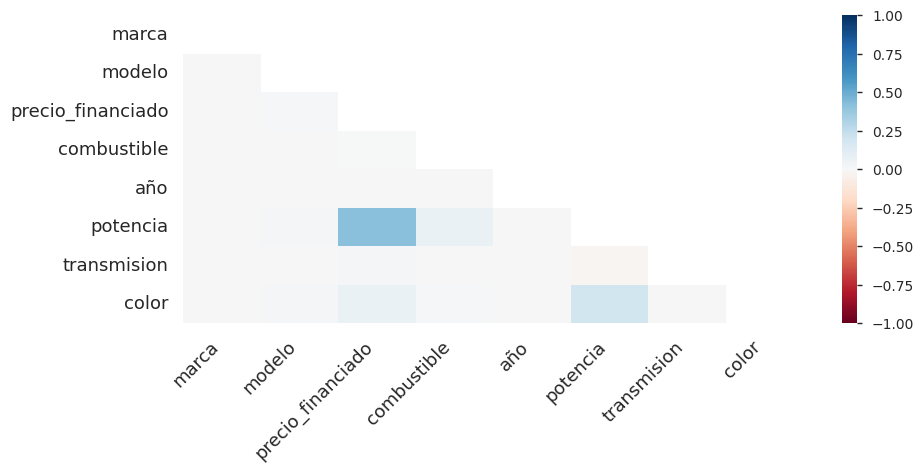

In [252]:
#Profiling del dataset
ProfileReport(train, title="Pandas Profiling Report", explorative=True)


### Comportamiento variables numéricas

Es necesario revisar las correlaciones para las variables numéricas, de existir una correlación superior a 0.8 se considera lo suficientemente alta como para que una de las columnas tenga que ser eliminada con el objetivo de asegurar la independencia entre las variables independientes y promoviendo a la reducción de dimensionalidad. Conservar únicamente una de las columnas garantiza una representación más coherente de los datos, evitando discrepancias en la interpretación.



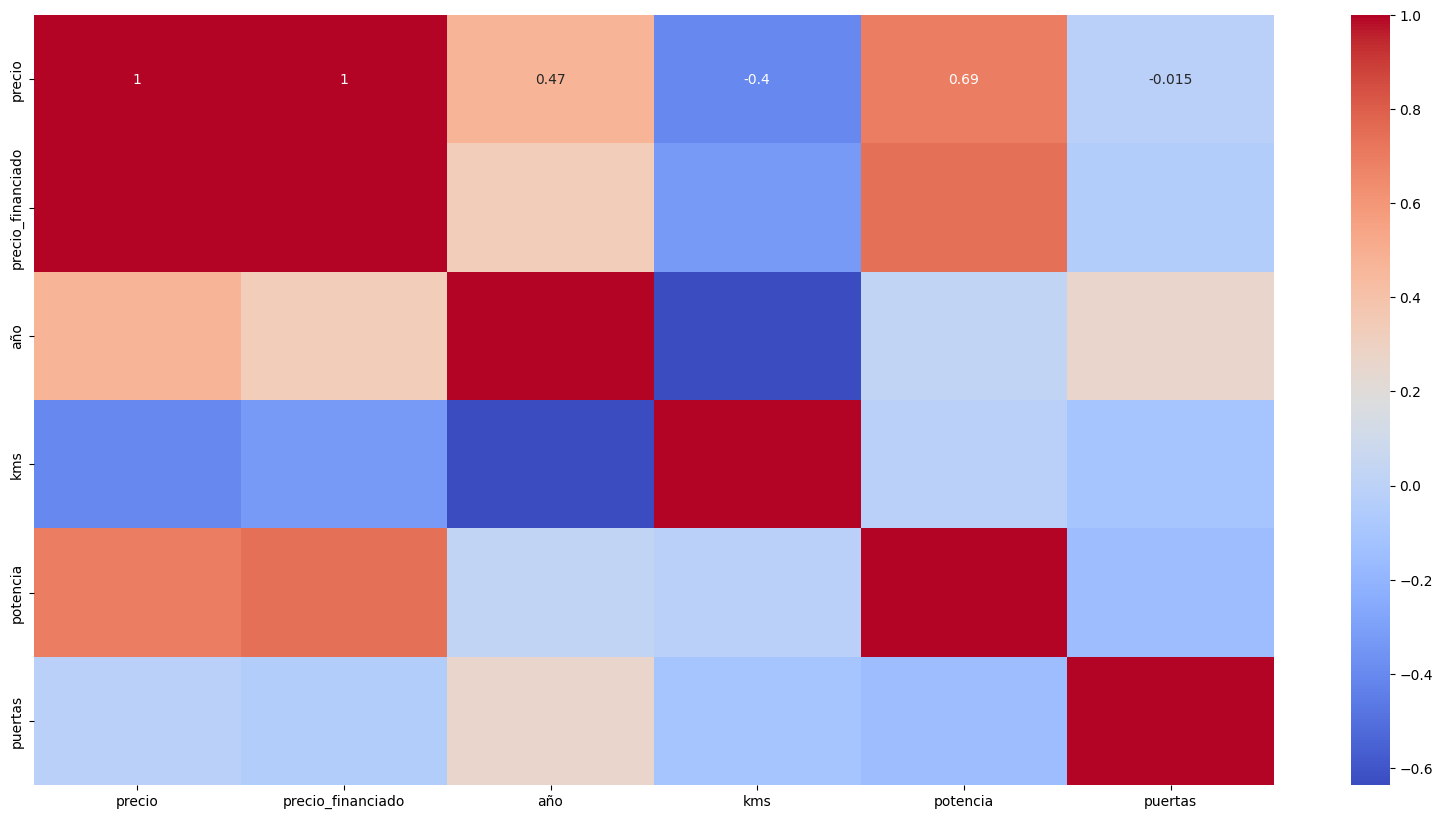

In [253]:
# Filtrar las columnas que son de tipo int o float para quitar las columnas categóricas
numeric_cols = train.select_dtypes(include=['int', 'float'])

# Calcular la matriz de correlación solo para esas columnas
correlation_matrix = numeric_cols.corr()

# Crear el heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

In [254]:
high_correlation_indices = np.where(np.abs(correlation_matrix) > 0.8)

# Filtrar las correlaciones para evitar duplicados y la diagonal principal
correlations = [(numeric_cols.columns[i], numeric_cols.columns[j], correlation_matrix.iloc[i, j])
                for i, j in zip(*high_correlation_indices) if i != j]
printed = []
# Mostrar las correlaciones mayores a 0.8
for col1, col2, corr in correlations:
    if (col1,col2) not in printed and (col1,col2) not in printed:
        print(f"Correlación entre {col1} y {col2}: {corr}")
        printed.append((col1,col2))
        printed.append((col2,col1))

Correlación entre precio y precio_financiado: 0.9970445808920533


Ya es posible observar que existe una correlación altísima entre `precio` y  `precio_financiado`, por lo que solo se mantendrá la variable de `precio` pues de las dos es la más representativa.

### Comportamiento de las variables categóricas

Como se está utilizando un algoritmo de regresión lineal, este no puede trabajar con variables categóricas y es necesario determinar qué variables pueden ser transformadas para que sean tomadas en cuenta y se puedan transformar correctamente. 

In [255]:
#Determinar unicidad en los datos de las columnas categoricas en porcentaje
categorical_cols = train.select_dtypes(include=['object'])

#Mostrar los valores únicos de las columnas categóricas
for col in categorical_cols.columns:
    print(f"Columna: {col}, Valores únicos:{categorical_cols[col].nunique()}, Valores únicos(%): {round(100*categorical_cols[col].nunique()/categorical_cols.shape[0], 2)}%")

Columna: marca, Valores únicos:73, Valores únicos(%): 0.18%
Columna: modelo, Valores únicos:908, Valores únicos(%): 2.27%
Columna: version, Valores únicos:15316, Valores únicos(%): 38.29%
Columna: combustible, Valores únicos:6, Valores únicos(%): 0.01%
Columna: transmision, Valores únicos:2, Valores únicos(%): 0.01%
Columna: color, Valores únicos:3041, Valores únicos(%): 7.6%
Columna: fecha_publicacion, Valores únicos:37668, Valores únicos(%): 94.17%


Como se puede observar, la variable de fecha_publicación tiene una cardinalidad bastante alta y por lo tanto es necesario eliminarla o transformarla para que haya menos unicidad. Como puede que la fecha de publicación sea importante porque existen temporadas donde se compran más automoviles y esto afecte el precio, se decidió transformar la fecha para que solo sea mes-año.

Dado el número de valores únicos que hay en las diferentes variables se propone un OneHot encoder para `transmision` y `combustible`, para el resto de las columnas se utilizará ordinal encoder debido a la cantidad elevada de elementos únicos, el DataFrame se volvería inmanejable de lo contrario.

### Decisiones de transformación de los datos

#### Consistencia

**Decisión 3:** Eliminar las columnas que tengan una correlación alta para asegurar la independencia entre las variables, en este caso `precio_financiado`.

**Decisión 4:** Convertir las columnas categóricas en variables categóricas utilizando OrdinalEncoder y One Hot Encoder, de acuerdo a lo definido durante el entendimiento de datos.

#### Validez
**Decisión 5:** Transformar los datos de la columna `fecha_publicacion` para que pueda ser agrupada por mes y año. Reduciendo la cardinalidad.

**Decisión 6:** Eliminar la columna `color` debido a su múltiples valores vacíos, su falta de relevancia a la hora de fijar el precio de un carro y por su alta cardinalidad.

#### Unicidad
Los valores ya cumplen con esta dimensión pues no existen registros duplicados en el dataset
#### Completitud
**Decisión 1:** Eliminar la columna `precio_financiado` por el alto porcentaje de valores faltantes.

**Decisión 2:** Eliminar las instancias con valores faltantes en las columnas no eliminadas en la _Decisión 1_.


In [256]:
#Pipeline de eliminar registros que tengan valores nulos
def delete_null_registers(data):
    return data.dropna(subset=[col for col in data.columns if col != 'precio_financiado'])

#Pipeline de eliminar registros que tengan valores nulos
register_deleter = FunctionTransformer(delete_null_registers)

#aplicar el pipeline
train = register_deleter.transform(train)
test = register_deleter.transform(test)

#Se realiza la separación de los datos en X_train, y_train, X_test y y_test
X_train = train.drop('precio', axis=1)
y_train = train['precio']
X_test = test.drop('precio', axis=1)
y_test = test['precio']

#Mostar los datos de entrenamiento
X_train.info()



<class 'pandas.core.frame.DataFrame'>
Index: 32998 entries, 27223 to 10862
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   marca              32998 non-null  object 
 1   modelo             32998 non-null  object 
 2   version            32998 non-null  object 
 3   precio_financiado  18658 non-null  float64
 4   combustible        32998 non-null  object 
 5   año                32998 non-null  float64
 6   kms                32998 non-null  int64  
 7   potencia           32998 non-null  float64
 8   puertas            32998 non-null  int64  
 9   transmision        32998 non-null  object 
 10  color              32998 non-null  object 
 11  fecha_publicacion  32998 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 3.3+ MB


## 2. Transformación de los datos

### 2.1. Creación del Pipeline de transformación


Se tratan primero las variables numéricas

In [257]:
#Definimos columnas a eliminar por correlación o por irrelevancia, como se repite precios_financiados, se elimina
drop_columns_corr = ['color']

#Definimos columnas a eliminar por nulos
drop_columns_null = ['precio_financiado']

#Para las funciones se utilizan los nombres de las variables para que queden en el archivo pkl
def delete_corr(data):
    return data.drop(drop_columns_corr, axis=1)

def delete_null(data):
    return data.drop(drop_columns_null, axis=1)



num_transformer = Pipeline(
    steps=[
        ('delete_null', FunctionTransformer(delete_null, validate=False)),
        ('scaler', MinMaxScaler())
    ]
)

Luego tratar variables categóricas.

In [258]:
def fix_fecha_column(column_value):
    # Convertir 2020-12-16 16:39:54 a solo 2020-12
    return column_value[:7]
    

def fix_cat_values(df):
    for column in df.columns:
        if column == 'fecha_publicacion':
            # Apply the fix_fecha_column function to the 'fecha_publicacion' column
            df[column] = df[column].apply(fix_fecha_column)
    return df

#Probar la función
X_train_test = X_train.copy()
X_train_test = fix_cat_values(X_train_test)
print('Estos son los mes_años: ',X_train_test['fecha_publicacion'].unique())
print('Estos son los numeros de mes-año en que se publicaron: ',X_train_test['fecha_publicacion'].nunique())

Estos son los mes_años:  ['2020-12' '2021-01' '2020-11' '2020-10' '2020-09' '2020-08']
Estos son los numeros de mes-año en que se publicaron:  6


In [259]:
cat_transformer = Pipeline(
    steps=[
        ('delete_corr', FunctionTransformer(delete_corr, validate=False)),
        ('fix_values', FunctionTransformer(fix_cat_values, validate=False)),
        ('ordinal_or_one_hot', ColumnTransformer(
            transformers=[
                ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ['marca', 'modelo','version']),
                ('onehot', OneHotEncoder(handle_unknown='ignore'), ['combustible', 'transmision', 'fecha_publicacion'])
            ],
            remainder='passthrough'
        ))
    ]
)

Así se verían los datos transformados, tras realizar todas las transformaciones estipuladas.

In [268]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, make_column_selector(dtype_include=np.number)),
        ('cat', cat_transformer, make_column_selector(dtype_include=object))   # Lista de columnas categóricas
    ]
)

#Mostrar los datos limpios tras transformarlos

#Encontrar los nombres de las columnas
cat_transformer.fit(X_train)
one_hot_encoder = cat_transformer.named_steps['ordinal_or_one_hot'].named_transformers_['onehot']
ordinal_encoder = cat_transformer.named_steps['ordinal_or_one_hot'].named_transformers_['ordinal']
cat_column_names = list(ordinal_encoder.get_feature_names_out()) + list(one_hot_encoder.get_feature_names_out())
numeric_column_names = [col for col in X_train.columns if col not in cat_column_names and col not in drop_columns_corr and col not in drop_columns_null and col not in ['fecha_publicacion','transmision','combustible']]
all_column_names = numeric_column_names + cat_column_names


col_names = all_column_names
col_names

#Se realiza la transformación de los datos
X_train_show = preprocessor.fit_transform(X_train)
X_train_show = pd.DataFrame(X_train_show, columns=col_names)

X_train_show.head()


año       kms  potencia   puertas  marca  modelo  version  \
0  0.878049  0.041397  0.130999  1.000000   47.0   580.0   7884.0   
1  0.902439  0.020568  0.208820  1.000000   67.0   721.0  13984.0   
2  0.975610  0.000003  0.173800  1.000000   60.0   433.0  12246.0   
3  0.512195  0.104738  0.211414  0.666667    6.0   663.0   1586.0   
4  0.609756  0.099751  0.092088  0.666667   49.0   133.0   9716.0   

   combustible_Diésel  combustible_Eléctrico  combustible_Gas licuado (GLP)  \
0                 1.0                    0.0                            0.0   
1                 1.0                    0.0                            0.0   
2                 0.0                    0.0                            0.0   
3                 0.0                    0.0                            0.0   
4                 1.0                    0.0                            0.0   

   ...  combustible_Gasolina  combustible_Híbrido  transmision_Automático  \
0  ...                   0.0                  0.0                     1.0   
1  ...                   0.0                  0.0                     1.0   
2  ...                   1.0                  0.0                     1.0   
3  ...                   1.0                  0.0                     0.0   
4  ...                   0.0                  0.0                     0.0   

   transmision_Manual  fecha_publicacion_2020-08  fecha_publicacion_2020-09  \
0                 0.0                        0.0                        0.0   
1                 0.0                        0.0                        0.0   
2                 0.0                        0.0                        0.0   
3                 1.0                        0.0                        0.0   
4                 1.0                        0.0                        0.0   

   fecha_publicacion_2020-10  fecha_publicacion_2020-11  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        1.0   

   fecha_publicacion_2020-12  fecha_publicacion_2021-01  
0                        1.0                        0.0  
1                        0.0                        1.0  
2                        0.0                        1.0  
3                        1.0                        0.0  
4                        0.0                        0.0  

[5 rows x 21 columns]

## Modelamiento

Para ahorrar tiempo se va a montar el pipeline de una vez al gridsearch para encontrar el mejor modelo

In [270]:
reprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, make_column_selector(dtype_include=np.number)),
        ('cat', cat_transformer, make_column_selector(dtype_include=object))   # Lista de columnas categóricas
    ]
)

process = [
        ('transform', preprocessor),
        ('regression', Lasso())  # Regularización Lasso
    ]
pipeline = Pipeline(process)

parameters = {
    'regression__alpha': [0.001, 0.01, 0.1, 1, 2, 3],
    'transform__num__scaler': [StandardScaler(), MinMaxScaler(), 'passthrough'],
}

grid_search = GridSearchCV(pipeline, parameters, verbose=2, scoring='neg_mean_squared_error', cv=5,error_score='raise')

In [272]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


c:\Users\user\BI-Sabroson\BI-Esculapio\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.102e+11, tolerance: 8.510e+08
  model = cd_fast.enet_coordinate_descent(


[CV] END regression__alpha=0.001, transform__num__scaler=StandardScaler(); total time=   3.2s


c:\Users\user\BI-Sabroson\BI-Esculapio\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.511e+11, tolerance: 7.823e+08
  model = cd_fast.enet_coordinate_descent(


[CV] END regression__alpha=0.001, transform__num__scaler=StandardScaler(); total time=   3.2s


c:\Users\user\BI-Sabroson\BI-Esculapio\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.710e+11, tolerance: 8.134e+08
  model = cd_fast.enet_coordinate_descent(


[CV] END regression__alpha=0.001, transform__num__scaler=StandardScaler(); total time=   3.1s


c:\Users\user\BI-Sabroson\BI-Esculapio\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.781e+11, tolerance: 7.314e+08
  model = cd_fast.enet_coordinate_descent(


[CV] END regression__alpha=0.001, transform__num__scaler=StandardScaler(); total time=   3.1s


c:\Users\user\BI-Sabroson\BI-Esculapio\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.786e+11, tolerance: 8.201e+08
  model = cd_fast.enet_coordinate_descent(


[CV] END regression__alpha=0.001, transform__num__scaler=StandardScaler(); total time=   3.2s


c:\Users\user\BI-Sabroson\BI-Esculapio\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.102e+11, tolerance: 8.510e+08
  model = cd_fast.enet_coordinate_descent(


[CV] END regression__alpha=0.001, transform__num__scaler=MinMaxScaler(); total time=   3.2s


c:\Users\user\BI-Sabroson\BI-Esculapio\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.511e+11, tolerance: 7.823e+08
  model = cd_fast.enet_coordinate_descent(


[CV] END regression__alpha=0.001, transform__num__scaler=MinMaxScaler(); total time=   3.1s


c:\Users\user\BI-Sabroson\BI-Esculapio\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.711e+11, tolerance: 8.134e+08
  model = cd_fast.enet_coordinate_descent(


[CV] END regression__alpha=0.001, transform__num__scaler=MinMaxScaler(); total time=   3.1s


c:\Users\user\BI-Sabroson\BI-Esculapio\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.781e+11, tolerance: 7.314e+08
  model = cd_fast.enet_coordinate_descent(


[CV] END regression__alpha=0.001, transform__num__scaler=MinMaxScaler(); total time=   3.1s


c:\Users\user\BI-Sabroson\BI-Esculapio\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.786e+11, tolerance: 8.201e+08
  model = cd_fast.enet_coordinate_descent(


[CV] END regression__alpha=0.001, transform__num__scaler=MinMaxScaler(); total time=   3.2s


c:\Users\user\BI-Sabroson\BI-Esculapio\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.102e+11, tolerance: 8.510e+08
  model = cd_fast.enet_coordinate_descent(


[CV] END regression__alpha=0.001, transform__num__scaler=passthrough; total time=   3.3s


c:\Users\user\BI-Sabroson\BI-Esculapio\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.511e+11, tolerance: 7.823e+08
  model = cd_fast.enet_coordinate_descent(


[CV] END regression__alpha=0.001, transform__num__scaler=passthrough; total time=   3.2s


c:\Users\user\BI-Sabroson\BI-Esculapio\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.710e+11, tolerance: 8.134e+08
  model = cd_fast.enet_coordinate_descent(


[CV] END regression__alpha=0.001, transform__num__scaler=passthrough; total time=   3.2s


c:\Users\user\BI-Sabroson\BI-Esculapio\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.781e+11, tolerance: 7.314e+08
  model = cd_fast.enet_coordinate_descent(


[CV] END regression__alpha=0.001, transform__num__scaler=passthrough; total time=   3.2s


c:\Users\user\BI-Sabroson\BI-Esculapio\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.786e+11, tolerance: 8.201e+08
  model = cd_fast.enet_coordinate_descent(


[CV] END regression__alpha=0.001, transform__num__scaler=passthrough; total time=   3.2s
[CV] END regression__alpha=0.01, transform__num__scaler=StandardScaler(); total time=   2.4s
[CV] END regression__alpha=0.01, transform__num__scaler=StandardScaler(); total time=   2.0s
[CV] END regression__alpha=0.01, transform__num__scaler=StandardScaler(); total time=   1.9s
[CV] END regression__alpha=0.01, transform__num__scaler=StandardScaler(); total time=   2.1s
[CV] END regression__alpha=0.01, transform__num__scaler=StandardScaler(); total time=   3.0s
[CV] END regression__alpha=0.01, transform__num__scaler=MinMaxScaler(); total time=   2.4s
[CV] END regression__alpha=0.01, transform__num__scaler=MinMaxScaler(); total time=   1.9s
[CV] END regression__alpha=0.01, transform__num__scaler=MinMaxScaler(); total time=   1.9s
[CV] END regression__alpha=0.01, transform__num__scaler=MinMaxScaler(); total time=   2.0s
[CV] END regression__alpha=0.01, transform__num__scaler=MinMaxScaler(); total time

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('delete_null',
                                                                                          FunctionTransformer(func=<function delete_null at 0x0000029D1D970E00>)),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000029D1D7B46D0>),
                                                                        ('cat',
                                                                         Pipeline(step...
                                                                                                                           OneHotEncoder(handle_unknown='ignore'),
                                                                                                                           ['combustible',
                                                                                                                            'transmision',
                                                                                                                            'fecha_publicacion'])]))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000029D1D7B7C10>)])),
                                       ('regression', Lasso())]),
             param_grid={'regression__alpha': [0.001, 0.01, 0.1, 1, 2, 3],
                         'transform__num__scaler': [StandardScaler(),
                                                    MinMaxScaler(),
                                                    'passthrough']},
             scoring='neg_mean_squared_error', verbose=2)

Los mejores parámetros encontrados fueron los siguientes:

In [275]:
best_model = grid_search.best_estimator_
grid_search.best_params_

{'regression__alpha': 3, 'transform__num__scaler': 'passthrough'}

In [276]:
y_pred_train_lasso = best_model.predict(X_train)
y_pred_train_lasso

array([18580.79986504, 30975.71670541, 28051.15125564, ...,
       28761.52465227,  5473.03482979,  7423.6639178 ])

## Evaluación de Métricas

In [282]:
n,p = X_train.shape

print('------------ Regresión  Regularizada Lasso con entrenamiento------------')
print("Residual sum of squares (RMSE): %.2f" % np.sqrt(mean_squared_error(y_train, y_pred_train_lasso)))
print("Mean Absolute Error (MAE): %.2f" % mean_absolute_error(y_train, y_pred_train_lasso))
print("R2-score: %.5f" % r2_score(y_train, y_pred_train_lasso) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(y_train, y_pred_train_lasso))*(n-1)/(n-p-1)) )

#Evaluar el modelo con los datos de test
y_pred_test_lasso = best_model.predict(X_test)

print('------------ Regresión  Regularizada Lasso con test------------')
print("Residual sum of squares (RMSE): %.2f" % np.sqrt(mean_squared_error(y_test, y_pred_test_lasso)))
print("Mean Absolute Error (MAE): %.2f" % mean_absolute_error(y_test, y_pred_test_lasso))
print("R2-score: %.5f" % r2_score(y_test, y_pred_test_lasso) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(y_test, y_pred_test_lasso))*(n-1)/(n-p-1)) )


------------ Regresión  Regularizada Lasso con entrenamiento------------
Residual sum of squares (RMSE): 10030.47
Mean Absolute Error (MAE): 5007.32
R2-score: 0.66786
Adj R2-score: 0.66774
------------ Regresión  Regularizada Lasso con test------------
Residual sum of squares (RMSE): 9427.66
Mean Absolute Error (MAE): 5199.85
R2-score: 0.66320
Adj R2-score: 0.66307


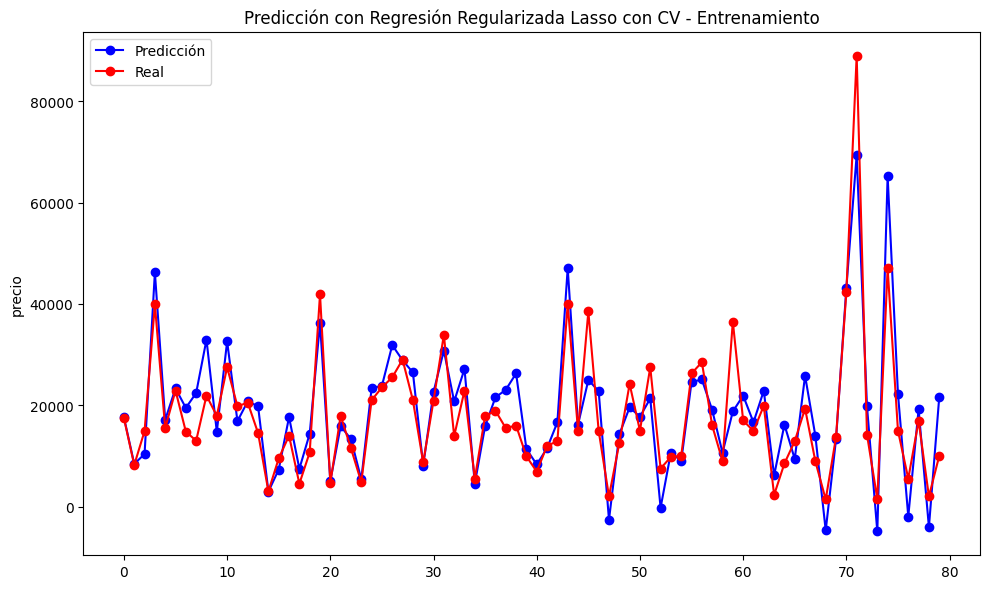

In [283]:
%matplotlib inline

# Show the results of the Lasso Regression
a = 1000
b = 1080
plt.figure(figsize=(10, 6))
xvals = list(range(b-a))
plt.plot(xvals, y_pred_train_lasso[a:b], 'bo-', label='Predicción')
plt.plot(xvals, y_train[a:b], 'ro-', label='Real')

plt.title('Predicción con Regresión Regularizada Lasso con CV - Entrenamiento')
plt.ylabel(y_train.name)
plt.legend()

plt.tight_layout()
plt.show()




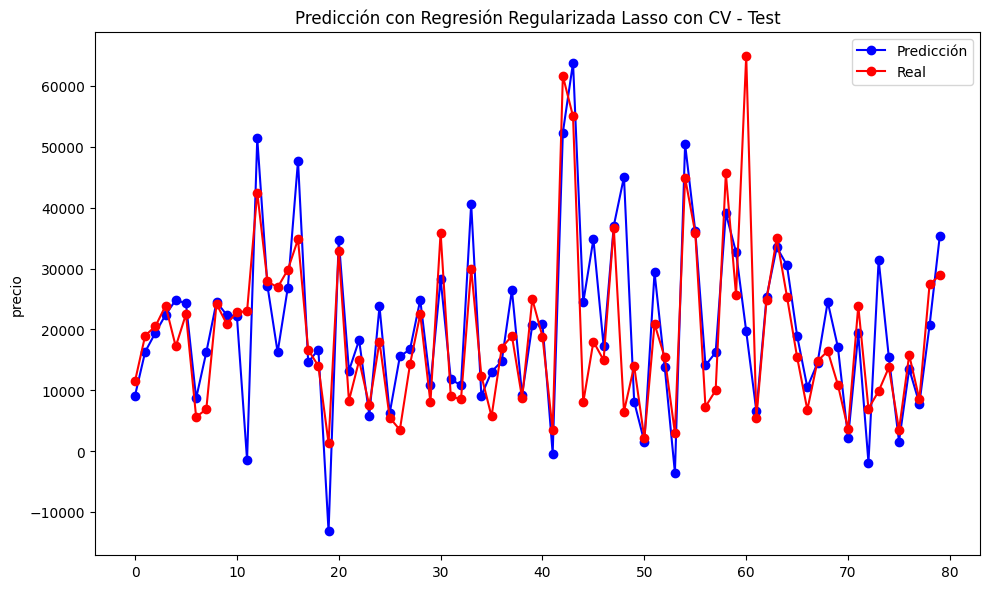

In [284]:
a = 1000
b = 1080
plt.figure(figsize=(10, 6))
xvals = list(range(b-a))
plt.plot(xvals, y_pred_test_lasso[a:b], 'bo-', label='Predicción')
plt.plot(xvals, y_test[a:b], 'ro-', label='Real')

plt.title('Predicción con Regresión Regularizada Lasso con CV - Test')
plt.ylabel(y_test.name)
plt.legend()

plt.tight_layout()
plt.show()


Como se puede observar, las métricas elegidas para evaluar muestran que el modelo tiene un buen desempeño en general, pues el coeficiente R2 tanto para entrenamiento como para el test muestra un 66% de variabilidad en la variable objetivo (precio) siendo explicada. Sin embargo, si hay que tomar en cuenta que el RMSE sigue siendo un poco alto lo cual indica que puede haber espacio para mejorar en la selección de las columnas.  

## Cálculo de coeficientes



In [285]:
lasso_model = best_model['regression']
print(f'Intercepto: {lasso_model.intercept_}')
coef = list(zip(['Intercepto'] + list(col_names), [lasso_model.intercept_] + list(lasso_model.coef_)))
coef = pd.DataFrame(coef,columns=['Variable','Parámetro'])
coef

Intercepto: -1206572.094954005


Variable     Parámetro
0                      Intercepto -1.206572e+06
1                             año  5.988090e+02
2                             kms -5.863879e-02
3                        potencia  1.660452e+02
4                         puertas -7.949239e+02
5                           marca  1.178968e+02
6                          modelo -1.129170e+00
7                         version -4.548468e-01
8              combustible_Diésel  2.946014e+03
9           combustible_Eléctrico  2.703497e+03
10  combustible_Gas licuado (GLP) -4.221906e+01
11  combustible_Gas natural (CNG) -0.000000e+00
12           combustible_Gasolina  0.000000e+00
13            combustible_Híbrido -1.416234e+02
14         transmision_Automático  5.278947e+02
15             transmision_Manual -1.567815e-14
16      fecha_publicacion_2020-08  0.000000e+00
17      fecha_publicacion_2020-09 -3.702501e+02
18      fecha_publicacion_2020-10 -0.000000e+00
19      fecha_publicacion_2020-11 -1.373539e+02
20      fecha_publicacion_2020-12  4.356454e+02
21      fecha_publicacion_2021-01  3.960710e+02

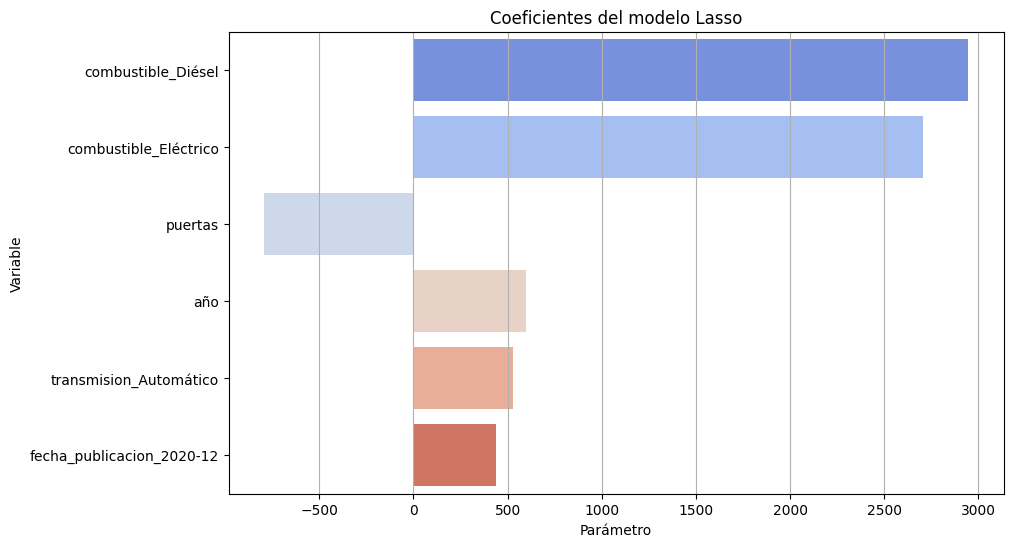

In [288]:
coef_df = coef.copy()

# Filtrar las variables con coeficientes distintos de cero y sin intercepto
coef_df = coef_df[(coef_df['Parámetro'] != 0) & (coef_df['Variable'] != 'Intercepto')]

# Ordenar por valor absoluto de los coeficientes para facilitar la visualización
coef_df['Abs_Parámetro'] = coef_df['Parámetro'].abs()
coef_df = coef_df.sort_values(by='Abs_Parámetro', ascending=False).head(6)

# Graficar los coeficientes
plt.figure(figsize=(10, 6))
sns.barplot(x='Parámetro', y='Variable', data=coef_df, palette='coolwarm')
plt.xlabel('Parámetro')
plt.ylabel('Variable')
plt.title('Coeficientes del modelo Lasso')
plt.grid(axis='x')
plt.show()


## Conclusiones

Luego de validar con las métricas de evaluación es posible decir que el algoritmo puede ser utilizado con confianza para determinar el precio de un automovil, no solo por el valor de las métricas 
